In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import naive_bayes
naive_bayes.__all__

['BernoulliNB', 'GaussianNB', 'MultinomialNB', 'ComplementNB', 'CategoricalNB']

In [2]:
# 准备数据
xigua = pd.read_csv("../data/xigua3.0.csv", index_col=0)
xigua_2_data = xigua[['密度', '含糖率']]
xigua_2_target = xigua[['好瓜']].replace({'是': 1, '否': -1})
xigua_2_data, xigua_2_target

(       密度    含糖率
 编号              
 1   0.697  0.460
 2   0.774  0.376
 3   0.634  0.264
 4   0.608  0.318
 5   0.556  0.215
 6   0.403  0.237
 7   0.481  0.149
 8   0.437  0.211
 9   0.666  0.091
 10  0.243  0.267
 11  0.245  0.057
 12  0.343  0.099
 13  0.639  0.161
 14  0.657  0.198
 15  0.360  0.370
 16  0.593  0.042
 17  0.719  0.103,
     好瓜
 编号    
 1    1
 2    1
 3    1
 4    1
 5    1
 6    1
 7    1
 8    1
 9   -1
 10  -1
 11  -1
 12  -1
 13  -1
 14  -1
 15  -1
 16  -1
 17  -1)

In [3]:
model = naive_bayes.GaussianNB()
model.fit(xigua_2_data, xigua_2_target)
model.score(xigua_2_data, xigua_2_target)
# xigua_predict = model.predict(xigua_2_data)

C:\conda\venv\torch\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7058823529411765

In [19]:
scale = 300
x = np.linspace(0, 1, scale + 1)
y = np.linspace(0, 1, scale + 1)
x, y = np.meshgrid(x, y)
disp_input = np.vstack((x.flatten(), y.flatten())).T
disp_input = np.vstack((x.flatten(), y.flatten())).T
disp_predict = model.predict(disp_input)
disp_predict

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

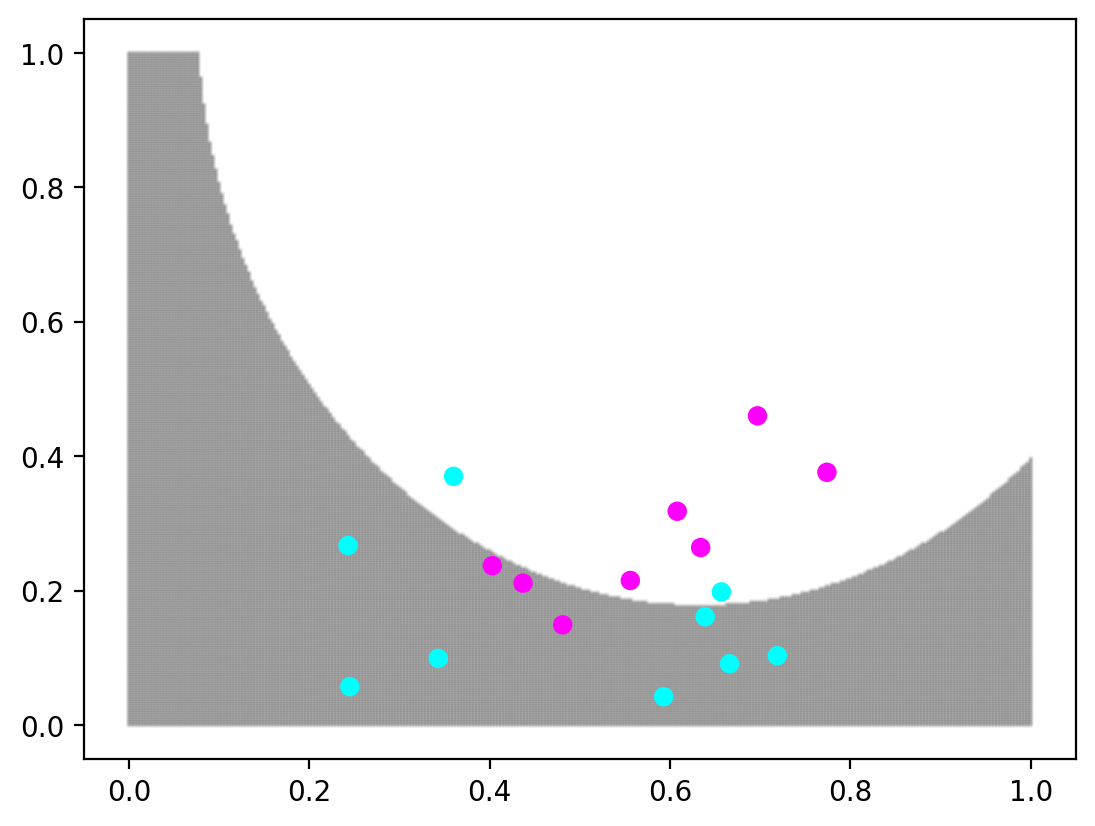

In [22]:
plt.figure(dpi=200)
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='gray', alpha=0.1,s=1)
plt.scatter(xigua_2_data['密度'],xigua_2_data['含糖率'], c=xigua_2_target.values, cmap='cool')
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.7058823529411765


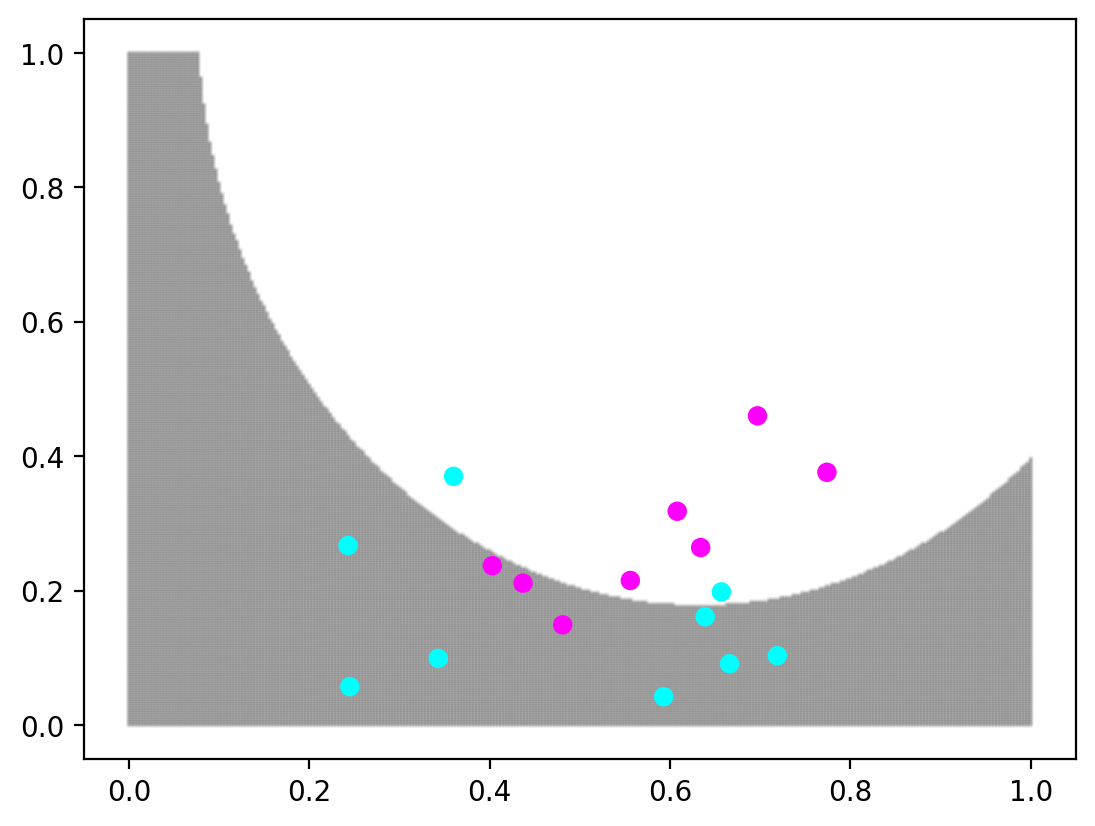

In [24]:
model = naive_bayes.GaussianNB(var_smoothing=1e-20)
model.fit(xigua_2_data, xigua_2_target)
print(model.score(xigua_2_data, xigua_2_target))
disp_predict = model.predict(disp_input)
plt.figure(dpi=200)
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='gray', alpha=0.1,s=1)
plt.scatter(xigua_2_data['密度'],xigua_2_data['含糖率'], c=xigua_2_target.values, cmap='cool')
plt.show()

In [27]:
import sklearn.datasets
from sklearn.datasets import fetch_california_housing
ch = fetch_california_housing()
ch_x_pd = pd.DataFrame(ch.data, columns=ch.feature_names)
ch_x = ch_x_pd[['Latitude','Longitude']]
ch_x = (ch_x-ch_x.min())/(ch_x.max()-ch_x.min())
ch_x

,Latitude,Longitude
0,0.567481,0.211155
1,0.565356,0.212151
2,0.564293,0.210159
3,0.564293,0.209163
4,0.564293,0.209163
...,...,...
20635,0.737513,0.324701
20636,0.738576,0.312749
20637,0.732200,0.311753
20638,0.732200,0.301793


In [41]:
ch_y = pd.DataFrame(ch.target, columns=['target'])
ch_y['class'] = ch_y['target'] - ch_y['target'].median() + 1
ch_y['class'] = ch_y['class']/abs(ch_y['class'])

ch_y

,target,class
0,4.526,1.0
1,3.585,1.0
2,3.521,1.0
3,3.413,1.0
4,3.422,1.0
...,...,...
20635,0.781,-1.0
20636,0.771,-1.0
20637,0.923,1.0
20638,0.847,1.0


0.9087209302325582


C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


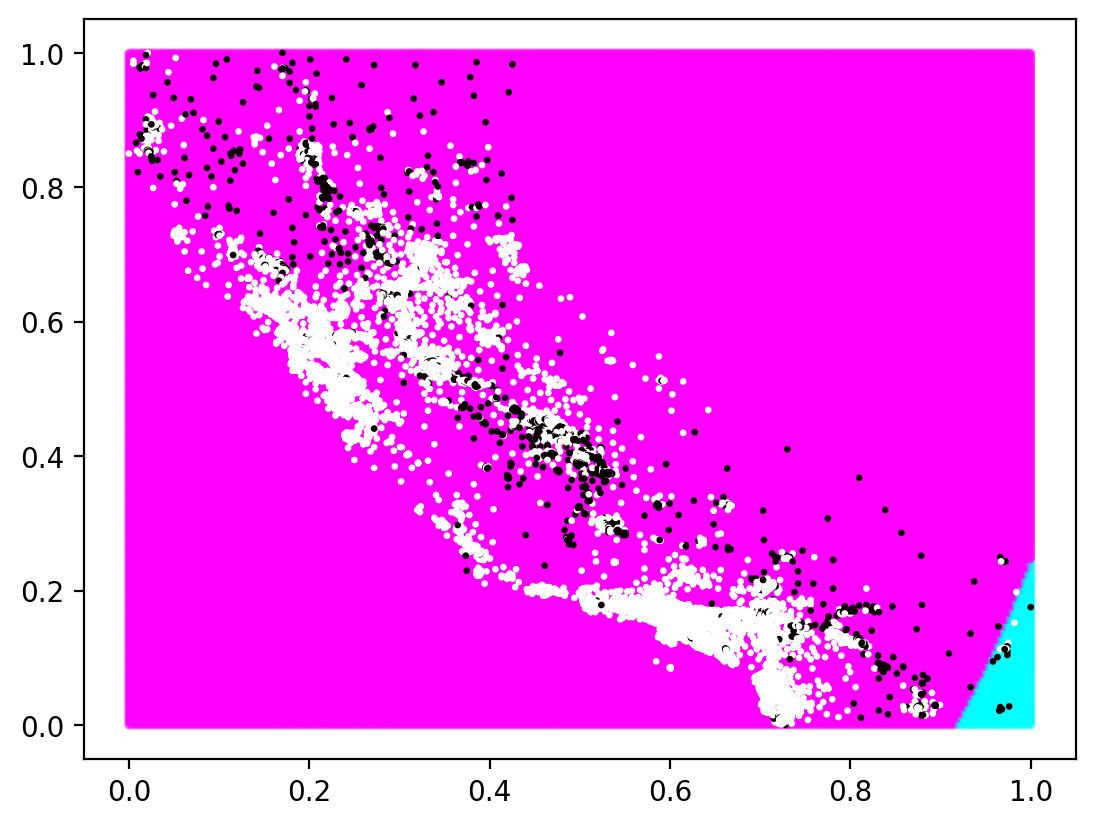

In [53]:
model = naive_bayes.GaussianNB(var_smoothing=1e-30)
model.fit(ch_x, ch_y['class'])
print(model.score(ch_x, ch_y['class']))
disp_predict = model.predict(disp_input)
plt.figure(dpi=200)
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='cool', alpha=0.5, s=5)
plt.scatter(ch_x['Longitude'],ch_x['Latitude'], c=ch_y['class'], cmap='hot',s=2)
plt.show()